## Importing Libraries

In [1]:
import cv2
import numpy as np
import time
import seaborn as sns
from scipy import fftpack
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

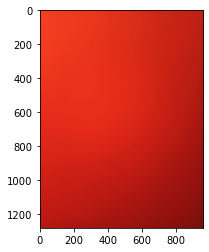

In [2]:
puppy = cv2.imread('./blood samples//blood p.jpeg')
puppy = cv2.cvtColor(puppy,cv2.COLOR_BGR2RGB)
plt.imshow(puppy)

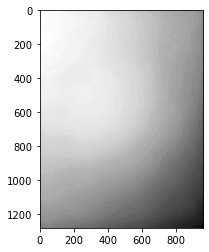

In [3]:
plt.imshow(puppy[:,:,0],cmap='gray')

In [4]:
puppy.shape

(1280, 960, 3)

In [5]:
res = np.mean(puppy[:,:,0])

In [6]:
res

202.89536865234376

In [7]:
res = np.mean(puppy[:,:,1])
res

35.71366292317708

In [8]:
res = np.mean(puppy[:,:,2])
res

21.980746256510418

In [9]:
new_puppy = cv2.resize(puppy,(320,240))

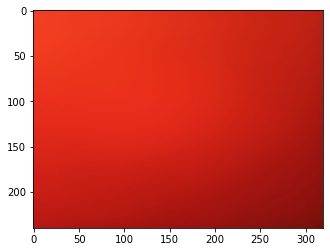

In [10]:
plt.imshow(new_puppy)

In [11]:
res = np.std(new_puppy[:,:,0])
res

27.28031573354019

In [12]:
res = np.std(new_puppy[:,:,1])
res

11.553380712671382

In [13]:
res = np.std(new_puppy[:,:,2])
res

4.76271118543094

In [6]:
#Blood Oximeter Reading--------------------------------------------------
video_capture = cv2.VideoCapture('blood samples/sample1.mp4')
#fps = video_capture.get(cv2.CAP_PROP_FPS)   
#frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
#duration = frame_count/fps  # capturing the video from the device value should be 0 for the default webacam
count = 0
arr = []
arr1 = [] 
while True:
    _,frame = video_capture.read() #Tuple Unpacking done here
    frame = cv2.resize(frame,(320,240))
    cv2.imshow('Video',frame)
    mean_red = np.mean(frame[:,:,2])
    mean_blue = np.mean(frame[:,:,0])
    std_red = np.std(frame[:,:,2])
    std_blue = np.std(frame[:,:,0])
    red = std_red/mean_red
    blue = std_blue/mean_blue
    sp_level = 100 - 5*(red/blue)
    arr.append(sp_level)
    count=count+1
    if cv2.waitKey(1) & 0xFF == ord('q') or count==600:  
        break
video_capture.release() #Releasing the hardware/software resources. 
cv2.destroyAllWindows() #destroying all the windows that is opened.
#print(arr)

In [7]:
print(np.mean(arr))

99.74784884748644


In [26]:
video_capture = cv2.VideoCapture('blood samples/sample1.mp4')
fps = video_capture.get(cv2.CAP_PROP_FPS)   
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps
duration

23.1603

In [40]:
#print(arr1)

In [5]:
#For Heart Rate---------------------------------------------
video_capture = cv2.VideoCapture('blood samples/sample1.mp4')
fps = video_capture.get(cv2.CAP_PROP_FPS)   
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
duration = 200/fps  # capturing the video from the device value should be 0 for the default webacam
count = 0
arr1 = [] 
while True:
    _,frame = video_capture.read() #Tuple Unpacking done here
    frame = cv2.resize(frame,(320,240))
    cv2.imshow('Video',frame)
    mean_red = np.mean(frame[:,:,2])
    arr1.append(mean_red)
    count=count+1
    if cv2.waitKey(1) & 0xFF == ord('q') or count==600:  
        break
video_capture.release() #Releasing the hardware/software resources. 
cv2.destroyAllWindows() #destroying all the windows that is opened.
#print(arr)

In [28]:
print(np.mean(arr1))

182.0920665581597


In [143]:
#print(arr1)

In [27]:
print((26/20.27)*60)

76.96102614701529


In [4]:
def count_peak(arr):
    count_peak=0
    for i in range(len(arr)-1):
        if i==0:
            if arr[i]>arr[i+1]:
                count_peak=count_peak+1
        else:
            if arr[i]>arr[i-1] and arr[i]>arr[i+1]:
                count_peak=count_peak+1
    return count_peak        
        

In [91]:
count_peak(arr1)

41

In [59]:
new_arr = arr1[100:]
print(len(new_arr))

500


In [60]:
np.std(arr)

0.4062890337585747

In [61]:
count_peak(arr1)

86

In [62]:
duration

6.764140764558771

In [167]:
600/fps

20.274964654703645

In [64]:
red = puppy[:,:,0]

In [19]:
sns.set_style('whitegrid')
#plt.figure(figsize=(12,12))
#sns.scatterplot(data=arr)

In [38]:
20.27/60

0.3378333333333333

In [55]:
arr_new=np.fft.fft2([arr1])

In [56]:
count_peak(arr_new)

0

In [86]:
count_peak(np.round(arr1[:],0))

13

In [47]:
print((34/20.275)*60)

100.61652281134403


In [29]:
n=600

In [30]:
fhat = np.fft.fft(arr1,n)

In [31]:
type(fhat)

numpy.ndarray

In [32]:
psd = fhat * np.conj(fhat)/n

In [33]:
type(psd)

numpy.ndarray

In [34]:
dt = 0.001

In [35]:
freq = (1/(dt*n))*np.arange(n)

In [36]:
type(freq)

numpy.ndarray

In [37]:
#plt.plot(freq)

In [14]:
#L=np.arange(1,np.floor(n/2),dtype='int')

In [38]:
indices = psd > np.std(arr1)

In [39]:
#plt.plot(indices)

In [40]:
psdclean=psd*indices

C:\Users\CHATANAYA\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


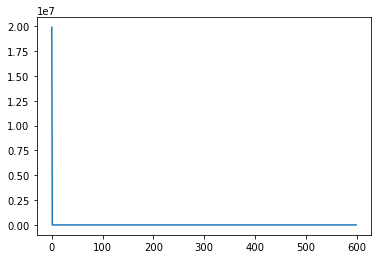

In [41]:
plt.plot(psdclean)

In [42]:
fhat = indices * fhat

In [43]:
ffilt=np.fft.ifft(fhat)

In [44]:
#plt.plot(np.real(ffilt))

C:\Users\CHATANAYA\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


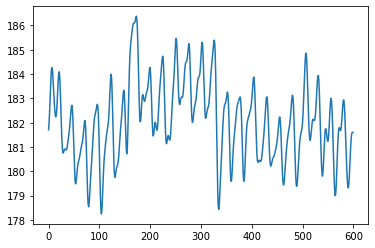

In [45]:
plt.plot(ffilt)

In [46]:
count_peak(ffilt)

34

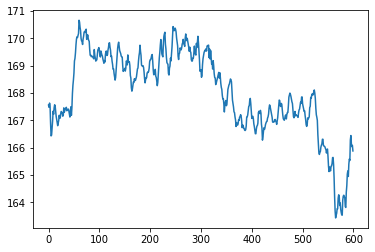

In [24]:
plt.plot(arr1)

In [26]:
count_peak(arr1)

104

In [28]:
np.std(arr1)

2.5741924291475873

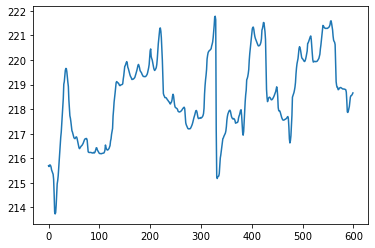

In [139]:
plt.plot(np.arange(0,600),arr1)

In [7]:
import numpy as np
import cv2
video_capture = cv2.VideoCapture('blood samples/sample2.mp4')
fps = video_capture.get(cv2.CAP_PROP_FPS)   
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
#duration = frame_count / fps
# if duration < 20 and duration > 30:
#     return False
heartbeat_count = 128
heartbeat_values = [0] * heartbeat_count
        # heartbeat_times = [time.time()] * heartbeat_count
det = []
while True:
    ret, frame = video_capture.read()
    if frame is None:
        break
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # img  = cv2.resize(img,(430,287))
    heartbeat_values = heartbeat_values[1:] + [np.average(img)]
    det.append(heartbeat_values)
video_capture.release()
cv2.destroyAllWindows()

In [8]:
flat_list = []
for sublist in det:
    for item in sublist:
        if item>0:
            flat_list.append(item)

print(sum(flat_list)/len(flat_list))

93.27261999823229


In [ ]:
#For Heart Rate---------------------------------------------
video_capture = cv2.VideoCapture('blood samples/sample2.mp4')
fps = video_capture.get(cv2.CAP_PROP_FPS)   
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
duration = 200/fps  # capturing the video from the device value should be 0 for the default webacam
count = 0
arr1 = [] 
while True:
    _,frame = video_capture.read() #Tuple Unpacking done here
    frame = cv2.resize(frame,(320,240))
    cv2.imshow('Video',frame)
    mean_red = np.mean(frame[:,:,2])
    arr1.append(mean_red)
    count=count+1
    if cv2.waitKey(1) & 0xFF == ord('q') or count==600:  
        break
video_capture.release() #Releasing the hardware/software resources. 
cv2.destroyAllWindows() #destroying all the windows that is opened.
#print(arr)